<a href="https://colab.research.google.com/github/snv1803/Face-detection/blob/main/Face%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dlib
!pip install opencv-python
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=93c2eaeea8442098e60ff57499442e8334383c2be6fbedc8882c99a42504a221
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [4]:
import face_recognition
import os

known_faces_dir = '/content/HP'
known_face_encodings = []
known_face_names = []

for file_name in os.listdir(known_faces_dir):
    image_path = os.path.join(known_faces_dir, file_name)
    image = face_recognition.load_image_file(image_path)
    face_encodings = face_recognition.face_encodings(image)

    if len(face_encodings) > 0:
        # Assuming one face per image, which might need adjustment for different datasets
        known_face_encodings.append(face_encodings[0])
        known_face_names.append(file_name.split('.')[0])


In [29]:
import cv2
import datetime

input_image_path = '/content/HP/Molly.jpg'
input_image = face_recognition.load_image_file(input_image_path)


face_locations = face_recognition.face_locations(input_image)
face_encodings = face_recognition.face_encodings(input_image, face_locations)

face_names = []

for face_encoding in face_encodings:

    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    name = "Unknown"

    if True in matches:
        first_match_index = matches.index(True)
        name = known_face_names[first_match_index]

    face_names.append(name)

current_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

attendance_list = []

for name in face_names:
    if name != "Unknown":
        attendance_list.append((name, current_time))

print("Attendance recorded:", attendance_list)


Attendance recorded: [('Molly', '2024-05-08 04:43:20')]


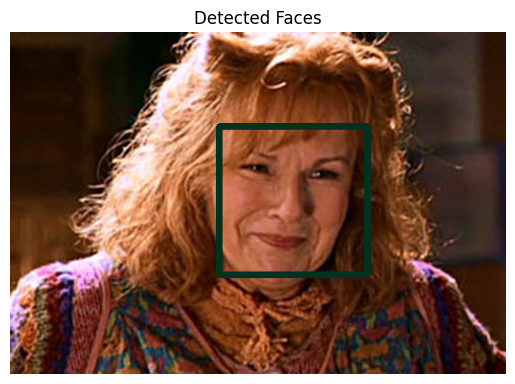

In [31]:
import matplotlib.pyplot as plt
image_with_faces = input_image.copy()


for (top, right, bottom, left) in face_locations:

    cv2.rectangle(
        image_with_faces,
        (left, top),
        (right, bottom),
        (1, 50, 32),
        5
    )

plt.imshow(image_with_faces)
plt.axis('off')
plt.title('Detected Faces')
plt.show()